# Problem 2 [Counting]
> Each exponential random sample represents the waiting time until an event occurs. Implement a routine to count the number of events that occur in 1 unit of time. Generate such counts for 1000 separate unit time intervals. How are these counts distributed? Justify your answer   
  
> _You will need to learn to use functions for plotting networks in the next questions. Recent versions of MATLAB have built-in network plotting functions. Python and R have the iGraph library. Python also has the networkx library._

We generate the exponential random variable with $\lambda = 1 $, and we test the interval with length of 5 for 1000 times. 

<IPython.core.display.Javascript object>


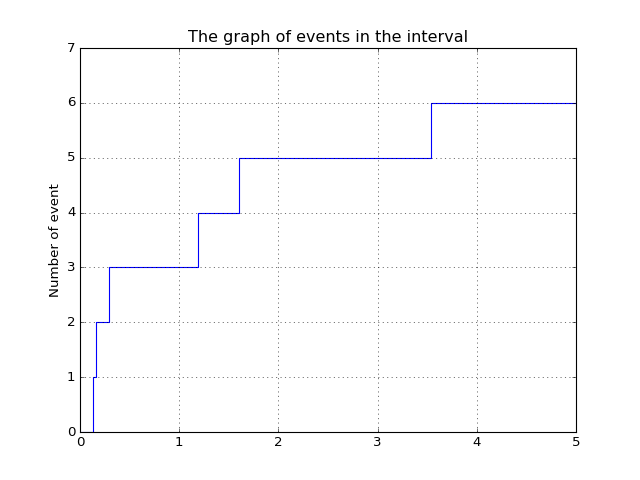

Totally, there are 6 events happened.


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# The default lambda is 1.
def my_expon_5():
    t = np.random.exponential();
    te = np.array([]);
    while t < 5:
        te = np.append(te,[t])
        t = t + np.random.exponential()
    return te
te = my_expon_5()
n = np.arange(0,np.size(te)+1,1)
n = np.append([0],n)
te = np.append([0],te)
te = np.append(te, 5)
plt.plot(te,n,drawstyle='steps')
plt.xlim([0,5])
plt.ylim([0,max(n)+1])
plt.grid()
plt.title('The graph of events in the interval')
plt.ylabel('Number of event')
plt.show()
print('Totally, there are '+ str(max(n))+' events happened.')

Next, we run the routine for 1,000 times to find out whether the number of events happened in the interval is belong to a specific distribution.

<IPython.core.display.Javascript object>


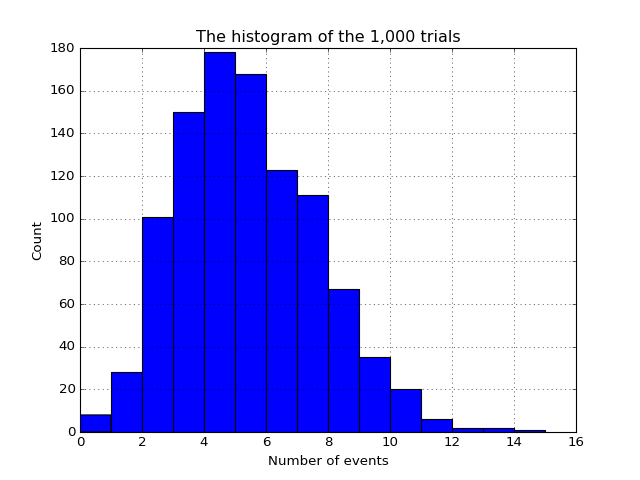

In [2]:
mysample=[]
for i in range(1000):
    mysample.append(np.size(my_expon_5()))
plt.figure()
on,obins,opatches = plt.hist(mysample,bins=np.arange(0,max(mysample)+1,1))
plt.title('The histogram of the 1,000 trials')
plt.ylabel('Count')
plt.xlabel('Number of events')
plt.grid()
plt.show()

The above figure shows a distribution like the Possion distribution. Recall the Poisson distribution,
$$
f_X(x)=\frac{\lambda ^ke^{-\lambda}}{k!}
$$
The $\lambda $ is the expectation of the number of events that will happen.  
In this case,  $\lambda = 1 \times 5 = 5$

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


<IPython.core.display.Javascript object>


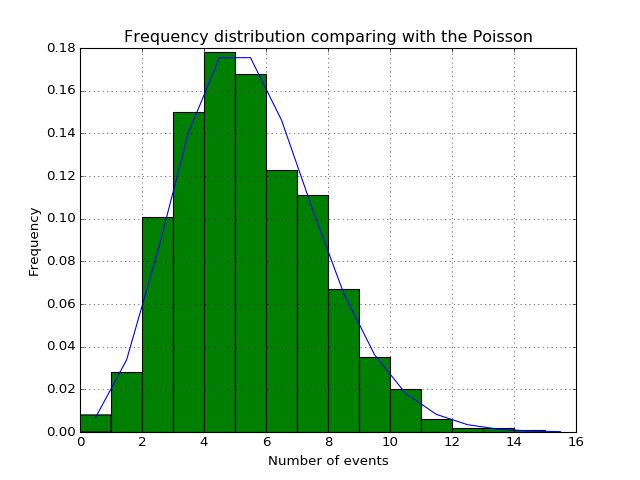

In [3]:
from scipy.stats import poisson
print(obins)
pmf = poisson.pmf(obins,5)
# We add 0.5 to compensate offset introduced by the histogram.
plt.figure()
plt.plot(obins+0.5,pmf)
plt.hist(mysample,bins=obins, normed = 1)
plt.title('Frequency distribution comparing with the Poisson')
plt.ylabel('Frequency')
plt.xlabel('Number of events')
plt.grid()
plt.show()

From the above figure, the Possion distribution seems fit it well. So let's do a Chi-square test of it to see the goodness of fit.

In [4]:
from scipy.stats import chisquare
print('The observed data '+ str(on))
en = pmf * 1000
en = np.append(en[0:-2],[en[-1]+en[-2]])
print('The expected data ' + np.array_str(en, precision = 1))
# Combine the group with sample count smaller than 5 into the smallest group with count > 5.
com_index = np.logical_or(on<5,en < 5)
into_index = on[com_index == False].argmin()
new_on = on[com_index==False]
new_en = en[com_index==False]
new_on[into_index] += sum(on[com_index])
new_en[into_index] += sum(en[com_index])
# The fucking chisquare!!!
chisquare(new_on,new_en)

The observed data [   8.   28.  101.  150.  178.  168.  123.  111.   67.   35.   20.    6.
    2.    2.    1.]
The expected data [   6.7   33.7   84.2  140.4  175.5  175.5  146.2  104.4   65.3   36.3
   18.1    8.2    3.4    1.3    0.6]


Power_divergenceResult(statistic=10.440754697766657, pvalue=0.49123003291912259)